In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = './data/'

In [3]:
data

'./data/'

# Raw file study

In [4]:
evaluations = pd.read_csv(data+'evaluation_ratings.csv')
movies = pd.read_csv(data+'movies_metadata.csv')
ratings = pd.read_csv(data+'ratings.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
evaluations.head()

,userId,movieId
0,1,110
1,1,1968
2,1,4878
3,1,54503
4,1,91542


In [6]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [8]:
def cleanedGenre(row):
    cleanned=''
    if row['genres']!='[]': 
        splitted = row['genres'].split('},')
        for i in range(len(splitted)):
            m=re.search('([A-Z])\w+', splitted[i])
            cleanned+=m.group(0).replace("'",'')
            if  i+1<len(splitted):
                cleanned+='|'
        return cleanned
    else:
        return ''


In [9]:
simplifiedMovies = movies[['id','title','genres']]

In [10]:
simplifiedMovies['Genres'] = simplifiedMovies.apply(lambda x: cleanedGenre(x),axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
simplifiedMovies.drop(['genres'],axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
simplifiedMovies.head()

,id,title,Genres
0,862,Toy Story,Animation|Comedy|Family
1,8844,Jumanji,Adventure|Fantasy|Family
2,15602,Grumpier Old Men,Romance|Comedy
3,31357,Waiting to Exhale,Comedy|Drama|Romance
4,11862,Father of the Bride Part II,Comedy


In [13]:
simplifiedMovies=simplifiedMovies.dropna()

In [14]:
simplifiedMovies['id']=pd.to_numeric(simplifiedMovies['id'])

In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,81834,5.0,1425942133
1,1,112552,5.0,1425941336
2,1,98809,0.5,1425942640
3,1,99114,4.0,1425941667
4,1,858,5.0,1425941523


In [16]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [17]:
len(ratings)

20824175

In [180]:
matrix = pd.pivot_table(ratings.head(5000),index='userId',columns='movieId',values='rating',fill_value=0)

In [184]:
matrix = pd.pivot_table(ratings.head(5000),index='userId',columns='movieId',values='rating')
matrix = matrix.fillna(matrix.mean())#VERSION FILL BY MEAN

In [181]:
matrix.head(10)

movieId,1,2,3,5,6,7,10,11,14,16,...,161582,163645,166461,166528,168252,168434,168612,171763,172547,174585
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
2,0.0,0.0,0.0,3,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
3,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
4,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
5,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
6,0.0,0.0,0.0,0,0,0,0.0,3,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
7,0.0,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
8,4.0,0.0,0.0,0,0,2,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
9,4.5,0.0,0.0,0,0,0,0.0,0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0


In [185]:
matrix.head(10)#fill by mean

movieId,1,2,3,5,6,7,10,11,14,16,...,161582,163645,166461,166528,168252,168434,168612,171763,172547,174585
userId,,,,,,,,,,,,,,,,,,,,,
1,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
2,3.9375,3.625,3.5,3.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
3,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
4,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
5,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
6,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.0,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
7,3.9375,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
8,4.0000,3.625,3.5,4.0,3.5,2.0,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5
9,4.5000,3.625,3.5,4.0,3.5,2.5,3.6875,3.5,2.0,3.875,...,3.0,2.5,2.5,4.0,5.0,4.5,2.5,0.5,2.0,0.5


In [186]:
matrix.shape

(62, 2269)

In [188]:
#Convert to np array
R = matrix.as_matrix()

#Normalize by each users mean
means = np.mean(R, axis = 1)
Rnormalized = R - means.reshape(-1, 1)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [189]:
Rnormalized

array([[ 0.40658131,  0.09408131, -0.03091869, ..., -3.03091869,
        -1.53091869, -3.03091869],
       [ 0.41157352,  0.09907352, -0.02592648, ..., -3.02592648,
        -1.52592648, -3.02592648],
       [ 0.41034684,  0.09784684, -0.02715316, ..., -3.02715316,
        -1.52715316, -3.02715316],
       ...,
       [ 0.41610761,  0.10360761, -0.02139239, ..., -3.02139239,
        -1.52139239, -3.02139239],
       [ 0.41067861,  0.09817861, -0.02682139, ..., -3.02682139,
        -1.52682139, -3.02682139],
       [-0.53615747,  0.08884253, -0.03615747, ..., -3.03615747,
        -1.53615747, -3.03615747]])

R=UΣVT : Decomposition into Two lower rank Matrix (approximation of R)

Here, U = Users, Σ = Diagonal matrix of weights, VT = films

In [192]:
from scipy.sparse.linalg import svds
# k: top features for approximation
U, sig, Vt = svds(Rnormalized, k = 30)

In [24]:
sig = np.diag(sig) # svds return only values for sig, need to diagonalize (see svds doc.)

In [25]:
#Generate prediction and add mean to return on a */5 value - denormalize
predictedArray = np.dot(np.dot(U, sig), Vt) + means.reshape(-1, 1)
predDf = pd.DataFrame(predictedArray, columns = matrix.columns)

In [26]:
predDf.head()

movieId,1,2,3,5,6,7,10,11,14,16,...,161582,163645,166461,166528,168252,168434,168612,171763,172547,174585
0,-0.022530,0.002612,0.000008,-0.008231,0.005753,-0.016939,-0.019997,-0.015168,-0.011707,0.002438,...,0.001466,0.001296,0.001296,0.000383,0.012015,0.000375,0.000407,0.000617,0.001126,0.000617
1,0.129154,-0.030772,0.003167,3.036904,-0.057543,0.125753,0.104423,0.011951,0.085831,-0.015303,...,-0.007605,-0.006282,-0.006282,-0.002098,-0.029608,-0.002402,-0.001187,-0.000992,-0.004960,-0.000992
2,-0.140680,-0.049478,0.000546,0.097882,-0.055623,-0.009453,0.149306,0.049345,-0.007457,-0.028605,...,-0.011405,-0.010084,-0.010084,0.005588,0.055872,0.006721,0.002187,-0.004802,-0.008764,-0.004802
3,-0.006309,0.001163,-0.000514,-0.003626,0.003304,-0.009946,-0.007219,-0.024791,-0.006142,0.001156,...,0.000470,0.000356,0.000356,0.000184,-0.015259,0.000235,0.000033,-0.000104,0.000241,-0.000104
4,-0.014255,0.000075,0.001108,0.001490,0.000030,0.003892,-0.006531,0.057764,0.005343,0.000917,...,-0.000455,-0.000407,-0.000407,-0.002194,-0.074449,-0.002447,-0.001435,-0.000217,-0.000360,-0.000217


note : Interest of Singular Value Decomposition : Avoid PCA and Transpose - SVD single shot PCA and Transpose K. We could approximate SVD with Grad. Desc too

note : Preparation step : L2 avoid overfitting & don't need L1 because matrix is already sparse ( lot of 0 values (unratting film)

note : Add Biais to keep the contribuation of user singularity

In [27]:
def alreadySeen(userId,ratings,movies):
    
    useId = userId - 1 # UserID starts at 1, shift for entry convenience
    alreadySeen = ratings[ratings.userId == (userId)]
    
    #Just add Film informations
    alreadySeen = alreadySeen.merge(movies, how = 'left', left_on = 'movieId', right_on = 'id').sort_values(['rating'], ascending=False)
    return alreadySeen.dropna()


In [28]:
def makeReco(userId,nbreco,pred,movies,ratings):
    useId = userId - 1 # UserID starts at 1, shift for entry convenience
    
    #Generate Movie list rated and predicted for this user
    userPred = pred.iloc[useId].sort_values(ascending=False)
    userPred = pd.DataFrame(userPred).reset_index()
    
    userSeen = alreadySeen(userId,ratings,movies)
    
   

    unseen = movies[~movies['id'].isin(userSeen['movieId'])]
    
    #Keep nbreco best predicted rated unseen films
    reco = (unseen.merge(userPred, how = 'left',left_on = 'id',right_on = 'movieId').
         rename(columns = {useId: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:nbreco, :-1]
                      )


    return reco

In [29]:
already = alreadySeen(1,ratings,simplifiedMovies)

In [193]:
reco = makeReco(1,15,predDf,simplifiedMovies,ratings)

In [31]:
already

,userId,movieId,rating,timestamp,id,title,Genres
18,1,96821,5.0,1425941382,96821.0,Caesar Must Die,Drama|Documentary
4,1,858,5.0,1425941523,858.0,Sleepless in Seattle,Comedy|Drama|Romance
12,1,1246,5.0,1425941556,1246.0,Rocky Balboa,Drama
19,1,147,4.5,1425942435,147.0,The 400 Blows,Drama
11,1,2762,4.5,1425941300,2762.0,Young and Innocent,Drama|Crime
15,1,2959,4.0,1425941601,2959.0,License to Wed,Comedy
14,1,4226,4.0,1425942228,4226.0,Shriek If You Know What I Did Last Friday the ...,Comedy
21,1,58559,4.0,1425942007,58559.0,Confession of a Child of the Century,Drama


In [194]:
reco

,id,title,Genres,movieId
4439,1648,Bill & Ted's Excellent Adventure,Adventure|Comedy|Science,1648.0
38082,1659,Texas - Doc Snyder hält die Welt in Atem,Comedy|Western,1659.0
33186,2232,The Legend of Paul and Paula,Drama|Romance,2232.0
11183,1023,Adam's Apples,Drama|Comedy|Crime,1023.0
582,581,Dances with Wolves,Adventure|Drama|Western,581.0
5156,1537,Changing Lanes,Action|Adventure|Crime|Thriller,1537.0
14517,47122,Flaming Creatures,Drama,47122.0
21092,6636,The Mugger,Drama|Foreign,6636.0
6386,302,Swimming Pool,Thriller|Crime,302.0
9536,1280,3-Iron,Drama|Romance|Crime,1280.0


# EVALUATION STEP PRE - PROD

We need to optimize latent feature number (k) based on minimizing RMSE metric

In [33]:
matrix.shape

(62, 2269)

In [34]:
min(matrix.shape)

62

So here , 1 <= k < 62

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Making test/train set

Be sure that we create a dataset with already rated & EXISTING film

In [149]:
datatest = ratings[ratings['userId']<62].merge(simplifiedMovies,left_on='movieId',right_on='id',how='left').dropna(subset=['title'])[['userId','rating','movieId']]


In [153]:
datatest = datatest.groupby(['userId']).max().reset_index()

In [36]:
#dataset = ratings.groupby(['userId']).max().reset_index().head(62) #Because size of predicted matrix limitation

In [157]:
#Keep 80% of dataset size to Train and 20% for test
train = datatest[:int(len(dataset)*0.8)]
test = datatest[int(len(dataset)*0.8):]

In [158]:
train = train[['userId','movieId']]
test = test[['userId','movieId']]

In [170]:
ks=[]
rmses=[]
for step in range(1,min(matrix.shape)):
    U, sig, Vt = svds(Rnormalized, k = step)
    sig = np.diag(sig)
    predictedArray = np.dot(np.dot(U, sig), Vt) + means.reshape(-1, 1)
    predDf = pd.DataFrame(predictedArray, columns = matrix.columns)
    
    result = pd.DataFrame(columns={'userId','movieId'})
    
    for users in range(1,len(train)+2):
        if users != 45: #Lost the poor guy with real film filtering
            topreco = makeReco(users,1,predDf,simplifiedMovies,ratings)['movieId'].values[0]
            result = result.append({'userId': users,'movieId':topreco}, ignore_index=True)
    #print('TEST TRAIN RMSE FOR K='+str(step)+': '+str(mean_squared_error(train['movieId'].values.tolist(), result['movieId'].values.tolist())))
    rmses.append(mean_squared_error(train['movieId'].values.tolist(), result['movieId'].values.tolist()))
    ks.append(step)

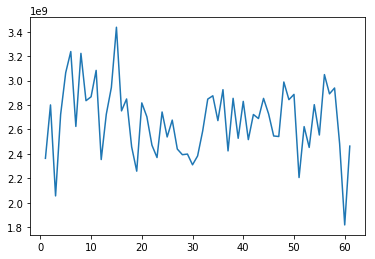

In [171]:
plt.plot(ks,rmses)

In [173]:
ksa=[]
maes=[]
for step in range(1,min(matrix.shape)):
    U, sig, Vt = svds(Rnormalized, k = step)
    sig = np.diag(sig)
    predictedArray = np.dot(np.dot(U, sig), Vt) + means.reshape(-1, 1)
    predDf = pd.DataFrame(predictedArray, columns = matrix.columns)
    
    result = pd.DataFrame(columns={'userId','movieId'})
    
    for users in range(1,len(train)+2):
        if users != 45: #Lost the poor guy with real film filtering
            topreco = makeReco(users,1,predDf,simplifiedMovies,ratings)['movieId'].values[0]
            result = result.append({'userId': users,'movieId':topreco}, ignore_index=True)
    maes.append(mean_absolute_error(train['movieId'].values.tolist(), result['movieId'].values.tolist()))
    ksa.append(step)

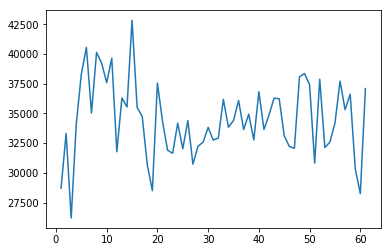

In [174]:
plt.plot(ks,maes)

In [206]:
U, sig, Vt = svds(Rnormalized, k = 5)
sig = np.diag(sig)
predictedArray = np.dot(np.dot(U, sig), Vt) + means.reshape(-1, 1)
predDf = pd.DataFrame(predictedArray, columns = matrix.columns)

In [207]:
makeReco(1,1,predDf,simplifiedMovies,ratings)

,id,title,Genres,movieId
1208,3090,The Treasure of the Sierra Madre,Action|Adventure|Drama|Western,3090.0
